# Model Evaluation and Improvement

## Cross Validation

- Data is split repeatedly into different training and test sets and multiple models are trained.

- **Model-1:** The first model is trained using the first fold as
the test set, and the remaining folds  as the training set.

- **Model-2:** The second model is trained using the second fold as
the test set, and the remaining folds  as the training set.

- This process is repeated using folds 3, 4, and 5 as test sets.

- For each of these five splits of the data into training and test sets,
accuracy computed



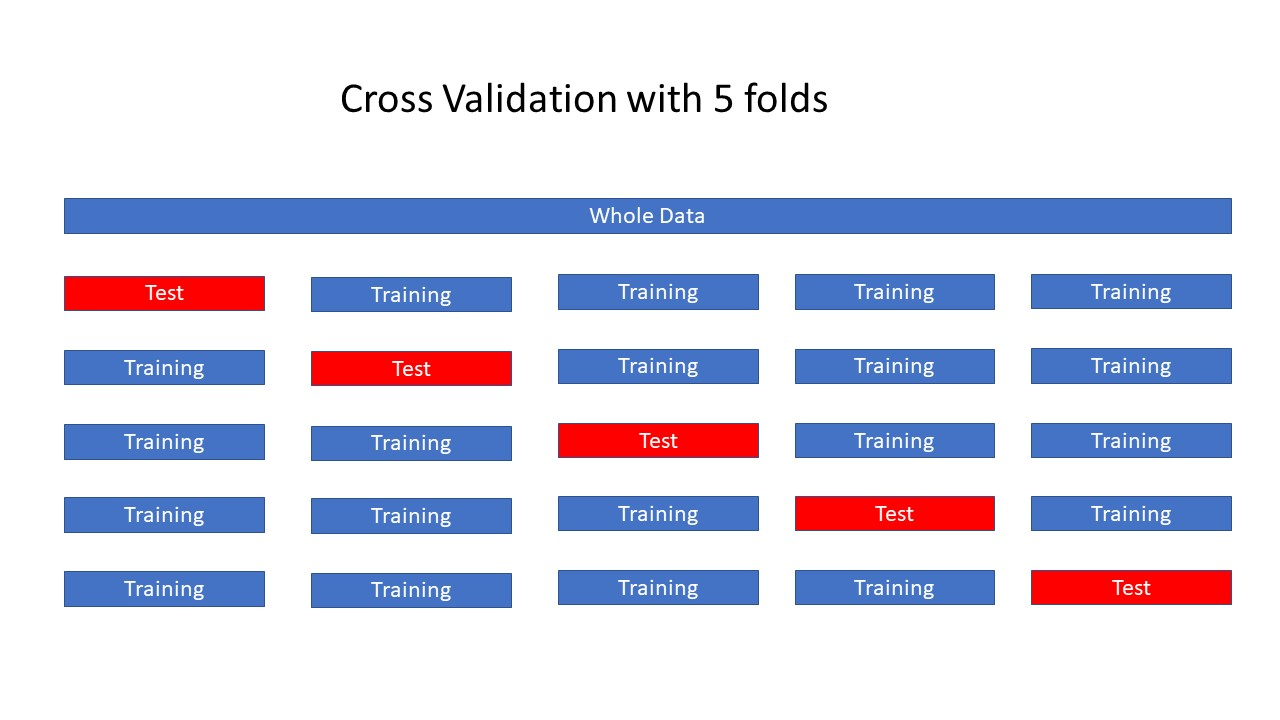

### CV on Breast Cancer Dataset

In [ ]:
# import breast cancer data
from sklearn.datasets import load_breast_cancer
dataset_bc = load_breast_cancer()

In [ ]:
# X_bc, y_bc and shapes
X_bc = dataset_bc.data
y_bc = dataset_bc.target
X_bc.shape, y_bc.shape

((569, 30), (569,))

In [ ]:
# training  and test sets
from sklearn.model_selection import train_test_split
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, random_state=42)

In [ ]:
# instantiate the class into an object
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
# fit the model
rfc.fit(X_bc_train, y_bc_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# train test scores
rfc.score(X_bc_train, y_bc_train), rfc.score(X_bc_test, y_bc_test)

(1.0, 0.965034965034965)

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X_bc, y_bc, cv = 5)

array([0.92982456, 0.94736842, 0.98245614, 0.96491228, 0.97345133])

In [ ]:
cross_val_score(rfc, X_bc, y_bc, cv = 5).mean()

0.9631113181183046

### CV on Iris Data

In [ ]:
# importiris data
from sklearn.datasets import load_iris
dataset_iris = load_iris()

In [ ]:
# X_iris, y_iris and shapes
X_iris = dataset_iris.data
y_iris = dataset_iris.target
X_iris.shape, y_iris.shape

((150, 4), (150,))

In [ ]:
# training  and test sets
from sklearn.model_selection import train_test_split
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, random_state=42)

In [ ]:
# instantiate the class into an object
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
# fit the model
rfc.fit(X_iris_train, y_iris_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# train test scores
rfc.score(X_iris_train, y_iris_train), rfc.score(X_iris_test, y_iris_test)

(1.0, 1.0)

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X_iris, y_iris, cv = 5)

array([0.96666667, 0.96666667, 0.93333333, 0.9       , 1.        ])

In [ ]:
cross_val_score(rfc, X_iris, y_iris, cv = 5).mean()

0.96

## Validation Set
- Test set can not be used to choose parameters.
- This accuracy might not be valid on a new unseen data
- One solution is split the data into 3 subsets.
  1. Training Set
  2. Validation Set
  3. Test Set

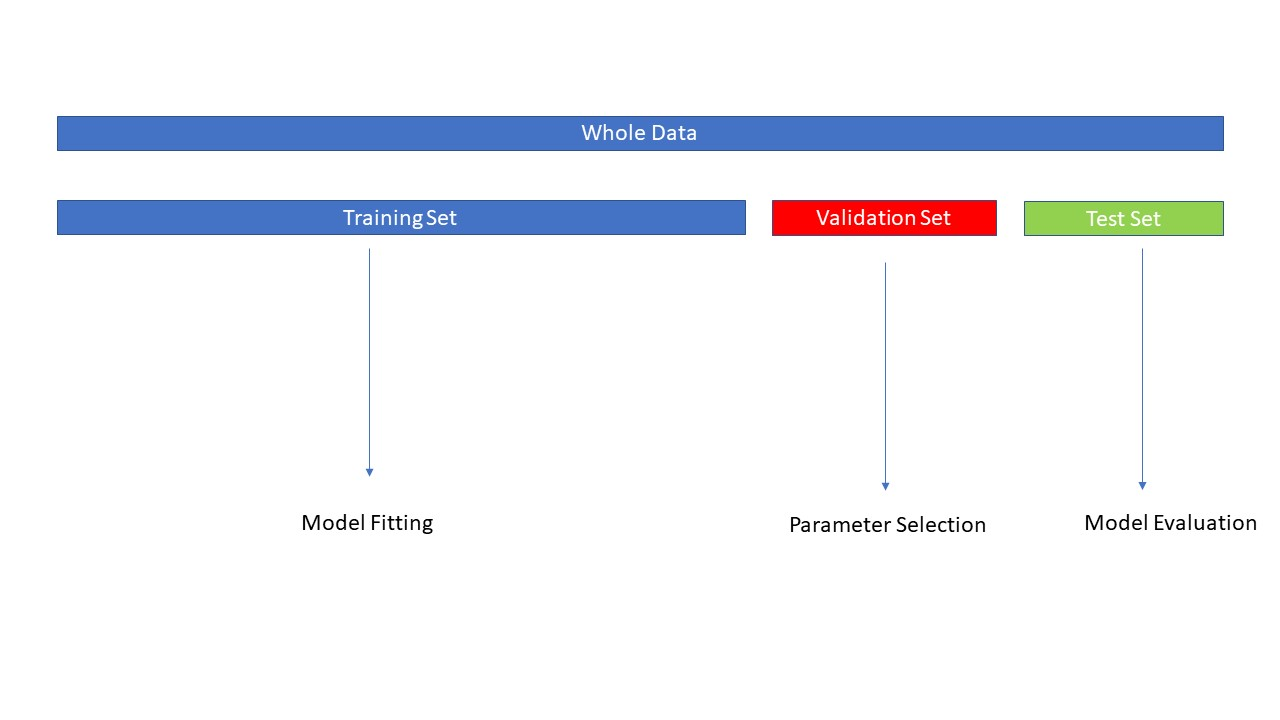

## Grid Search
- tuning its parameters
- all possible combinations of parameters are considered

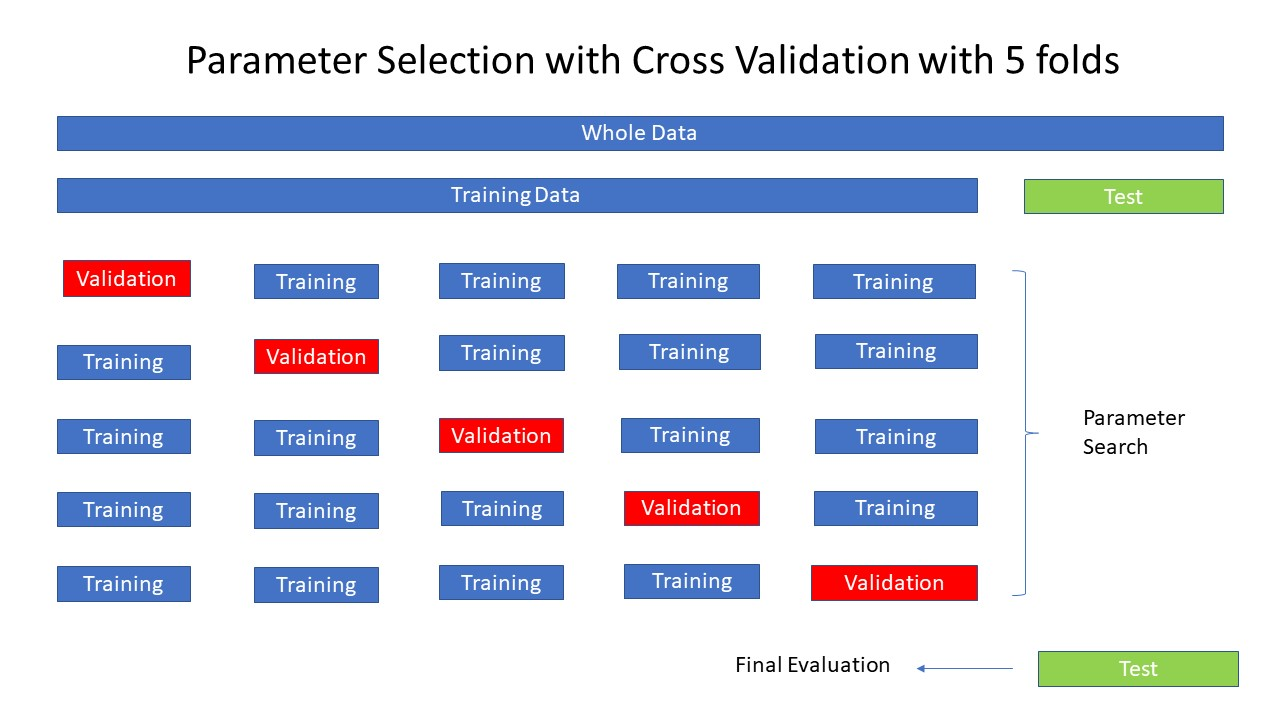

### GS on Breast Cancer Data

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# parameters
param_grid = {'max_depth': [3,5,7],'n_estimators': [5,10,20,30]}

In [ ]:
# instantiate the GridSearchCV class with the model rfc,
#the parameter grid to search (param_grid), and the cross-validation strategy
grid_search = GridSearchCV(rfc, param_grid, cv=5)

In [ ]:
# fit
grid_search.fit(X_bc_train, y_bc_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# best_params
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [ ]:
# best scores
grid_search.best_score_

0.9671682626538989

In [ ]:
# training score
grid_search.score(X_bc_train, y_bc_train)

0.9929577464788732

In [ ]:
# test score
grid_search.score(X_bc_test, y_bc_test)

0.972027972027972

In [ ]:
# best estimator
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# details: cv_rsults
grid_search.cv_results_

{'mean_fit_time': array([0.01080871, 0.0189641 , 0.03779688, 0.05854774, 0.01062713,
        0.01977334, 0.03763075, 0.05930386, 0.01048241, 0.01990156,
        0.0400435 , 0.06557817]),
 'mean_score_time': array([0.00128298, 0.00221763, 0.0035193 , 0.00469403, 0.00154815,
        0.00189924, 0.00312457, 0.00444589, 0.00128708, 0.00187745,
        0.00295291, 0.00419545]),
 'mean_test_score': array([0.93655267, 0.94128591, 0.93428181, 0.94363885, 0.94369357,
        0.93425445, 0.94837209, 0.96716826, 0.93660739, 0.95072503,
        0.95305062, 0.96005472]),
 'param_max_depth': masked_array(data=[3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[5, 10, 20, 30, 5, 10, 20, 30, 5, 10, 20, 30],
              mask=[False, False, False, False, False, False, False, False,
                  

### GS on Iris Data

In [ ]:
# parameters
param_grid = {'max_depth': range(1,20),'n_estimators': range(10,101,10)}

In [ ]:
# instantiate the GridSearchCV class with the model rfc,
#the parameter grid to search (param_grid), and the cross-validation strategy
grid_search = GridSearchCV(rfc, param_grid, cv=5)

In [ ]:
# fit
grid_search.fit(X_iris_train, y_iris_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# best_params
grid_search.best_params_

{'max_depth': 7, 'n_estimators': 70}

In [ ]:
# best scores
grid_search.best_score_

0.9636363636363636

In [ ]:
# training score
grid_search.score(X_iris_train, y_iris_train)

1.0

In [ ]:
# test score
grid_search.score(X_iris_test, y_iris_test)

1.0

In [ ]:
# best estimator
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# details: cv_rsults
grid_search.cv_results_

{'mean_fit_time': array([0.01866593, 0.03106565, 0.04552794, 0.06790624, 0.07687678,
        0.09031014, 0.10454798, 0.12000871, 0.13047867, 0.15131745,
        0.01532474, 0.02934427, 0.0468524 , 0.06570644, 0.0735219 ,
        0.09161191, 0.10417757, 0.12089086, 0.13640327, 0.14793692,
        0.01580286, 0.03049855, 0.04453883, 0.0597693 , 0.08049979,
        0.08769288, 0.10848584, 0.11946206, 0.13440766, 0.14998646,
        0.01535416, 0.02993388, 0.04880223, 0.06020684, 0.07621012,
        0.09609208, 0.10308738, 0.1190547 , 0.13517075, 0.14913974,
        0.01619954, 0.03013425, 0.04525523, 0.06009493, 0.07660279,
        0.08965368, 0.10505962, 0.11767054, 0.13540196, 0.15582261,
        0.0157094 , 0.03010774, 0.04812093, 0.05972247, 0.07412481,
        0.09342036, 0.10494738, 0.12602863, 0.13401251, 0.14967752,
        0.01508179, 0.02975326, 0.04495173, 0.05921097, 0.07787557,
        0.0901052 , 0.10657549, 0.12138319, 0.13431153, 0.15414605,
        0.01570415, 0.03019056,

## Manual Grid search

In [ ]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbor_list = range(1,22,2)

best_val_score = 0
best_param = None

for nn in neighbor_list:
  knn = KNeighborsClassifier(n_neighbors=nn)
  knn.fit(X_train, y_train)
  val_score = knn.score(X_val, y_val)

  if val_score > best_val_score :
    best_val_score = val_score
    best_param = nn

print(f'Best Parameter: n_neighbors={best_param}')
print(f'Best Validation Score = {round(best_val_score)} ')

knn = KNeighborsClassifier(n_neighbors=best_param)
knn.fit(X_train_val, y_train_val)
test_score = knn.score(X_test, y_test)

print(f'Test score of best model is: {round(test_score,2)}')

Best Parameter: n_neighbors=5
Best Validation Score = 1 
Test score of best model is: 0.94
